In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import scipy.stats as stats

# Imort CSV file-

In [2]:
file_path = "C:/Users/TARUN/OneDrive/Desktop/My DSA/internship/Quantium/"

dataset = pd.read_csv(file_path + "QVI_data.csv")

In [3]:
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
# Number of rows and column
dataset.shape

(264834, 12)

In [5]:
# Unique values in each column
dataset.nunique()

LYLTY_CARD_NBR       72636
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
PACK_SIZE               21
BRAND                   21
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


Create a Month & Year Cloumn

In [7]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
dataset['Month_Year'] = dataset['DATE'].dt.strftime('%m/%y')
dataset['Month_Year']

0         10/18
1         09/18
2         03/19
3         03/19
4         11/18
          ...  
264829    12/18
264830    10/18
264831    10/18
264832    10/18
264833    12/18
Name: Month_Year, Length: 264834, dtype: object

Grouping by store number & month year

In [8]:
chips_group_before = dataset.groupby(['STORE_NBR' , 'Month_Year'])
total_grp = chips_group_before['TOT_SALES'].sum()
total_grp

STORE_NBR  Month_Year
1          01/19         154.80
           02/19         225.40
           03/19         192.90
           04/19         192.90
           05/19         221.40
                          ...  
272        08/18         372.85
           09/18         304.70
           10/18         430.60
           11/18         376.20
           12/18         403.90
Name: TOT_SALES, Length: 3169, dtype: float64

Total Sales by Store Number

In [9]:
chip_grp_sales = dataset.groupby(['STORE_NBR'])['TOT_SALES'].sum()
chip_grp_sales

STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64

Total Sales in Trial Stores

In [10]:
trial_store = chip_grp_sales[76:88]
trial_store

STORE_NBR
77     3040.00
78     9381.25
79    11831.20
80    11756.90
81    14361.95
82     4103.50
83     9924.90
84     5396.30
85       13.90
86    10635.35
87     3991.60
88    16333.25
Name: TOT_SALES, dtype: float64

Total sales of Store 77 - $3040 ; Store 86 - $10635.35 ; Store 88 - $16333.25

Sorting Stores by Total Sales Looking For Match For Store 77

In [11]:
total_sorted = chip_grp_sales.sort_values(ascending = True)
total_sorted.iloc[57:75]

STORE_NBR
41     2570.20
268    2601.05
195    2608.25
163    2635.70
6      2684.90
53     2715.05
214    2720.40
176    2752.90
233    2826.90
255    2835.30
185    2868.60
187    2909.70
205    2966.80
220    3008.20
50     3009.80
46     3023.45
141    3025.40
77     3040.00
Name: TOT_SALES, dtype: float64

In [12]:
store_control_one = [41, 268, 195, 163, 6, 53, 214, 176, 233, 255, 185, 187, 205, 220, 50 ,46 ,141, 77]
control_one = pd.DataFrame({'Value' : total_grp[store_control_one]})
print(control_one)

                      Value
STORE_NBR Month_Year       
41        01/19       169.0
          02/19       234.6
          03/19       226.2
          04/19       231.3
          05/19       258.8
...                     ...
77        08/18       255.5
          09/18       225.2
          10/18       204.5
          11/18       245.3
          12/18       267.3

[216 rows x 1 columns]


Putthing Chart into Pivot Chart Formate

In [13]:
pivot_chips1 = control_one.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = 'Value')
pivot_chips1

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
Month_Year,,,,,,,,,,,,,,,,,,
01/19,191.1,169.0,176.20,223.9,172.90,204.4,340.3,208.9,187.2,261.1,184.2,153.30,256.1,232.5,238.7,177.5,231.7,157.70
02/19,224.0,234.6,222.40,154.5,179.10,235.0,246.7,182.0,248.7,217.8,246.5,185.50,171.8,209.5,202.9,244.0,215.7,165.00
03/19,179.5,226.2,259.20,227.0,225.80,278.5,241.7,268.8,246.4,245.3,247.2,186.70,331.1,286.5,269.3,199.1,206.6,225.00
04/19,197.9,231.3,260.00,242.4,227.80,263.5,186.2,198.3,227.4,283.6,240.2,181.70,195.1,255.2,220.1,158.6,239.4,191.50
05/19,257.3,258.8,243.55,219.5,272.35,299.3,194.9,233.8,289.5,314.6,218.3,261.30,246.7,203.0,259.6,344.4,220.7,245.80
06/19,207.4,237.7,280.30,270.8,198.90,264.7,238.4,240.3,269.3,222.8,255.3,184.60,227.9,252.1,267.7,221.0,316.3,224.70
07/18,260.0,216.4,253.00,314.4,229.80,296.8,272.8,188.6,287.2,225.6,253.9,227.50,320.6,182.4,244.1,290.7,254.1,224.00
08/18,203.2,209.8,240.70,292.4,255.10,255.5,225.3,183.1,147.1,276.3,214.3,332.25,283.6,249.4,275.0,285.9,171.9,322.65
09/18,207.7,216.1,233.00,258.8,188.00,225.2,232.8,269.5,195.4,196.9,276.1,152.90,215.5,218.6,219.3,228.6,227.7,174.40


Creat Plot chart pivot_chip1

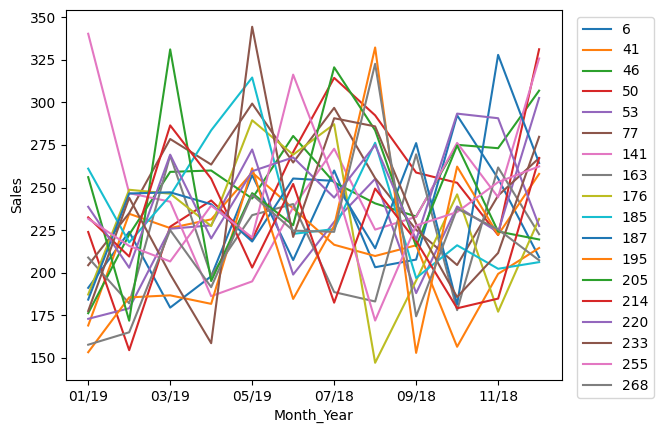

In [14]:
pivot_chips1.plot()
plt.legend(loc = "upper right" , bbox_to_anchor = (1.20 , 1))
plt.ylabel("Sales")
plt.show()

Looking At Correlation

In [15]:
pivot_chips1.corr(method = 'pearson')

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,,
6,1.000000,-0.247151,0.256520,0.006834,0.242594,-0.021268,-0.027162,-0.295525,0.345540,-0.155127,-0.041647,0.398130,0.088312,-0.878726,0.416445,0.270639,0.132702,0.219004
41,-0.247151,1.000000,0.164603,-0.119241,0.167031,0.762292,-0.644727,0.275608,0.450519,0.339814,0.349995,-0.047535,-0.237444,0.292472,-0.341097,0.500753,0.069930,0.064578
46,0.256520,0.164603,1.000000,0.503370,0.650741,0.386913,-0.113383,0.165461,0.269525,-0.330201,0.420943,0.374234,0.005459,0.133498,0.322455,0.116010,0.457896,0.348140
50,0.006834,-0.119241,0.503370,1.000000,0.560896,0.304387,0.277132,-0.068682,-0.021411,-0.155053,0.052646,0.423526,0.374344,0.186751,0.141485,0.284899,0.264615,0.404818
53,0.242594,0.167031,0.650741,0.560896,1.000000,0.526309,-0.042187,-0.074408,0.140227,0.238337,0.004825,0.763772,0.209564,0.141150,0.265352,0.546609,-0.080768,0.583553
77,-0.021268,0.762292,0.386913,0.304387,0.526309,1.000000,-0.413535,0.167020,0.531159,0.373824,0.285749,0.271905,0.291275,0.208531,0.013562,0.613063,0.099836,0.372558
141,-0.027162,-0.644727,-0.113383,0.277132,-0.042187,-0.413535,1.000000,-0.152094,-0.125022,-0.434634,-0.198275,-0.090739,0.163641,-0.004689,-0.060033,-0.127935,0.205388,-0.324463
163,-0.295525,0.275608,0.165461,-0.068682,-0.074408,0.167020,-0.152094,1.000000,-0.063802,-0.216258,0.600451,-0.399545,0.010123,0.260964,0.137705,-0.061831,0.217826,-0.155875
176,0.345540,0.450519,0.269525,-0.021411,0.140227,0.531159,-0.125022,-0.063802,1.000000,0.089027,-0.097138,-0.118839,0.118971,-0.152799,-0.108080,0.292296,0.425772,-0.149257


Store 41 & 77 has the strongest correlation at 0.762. Lets Graph it.

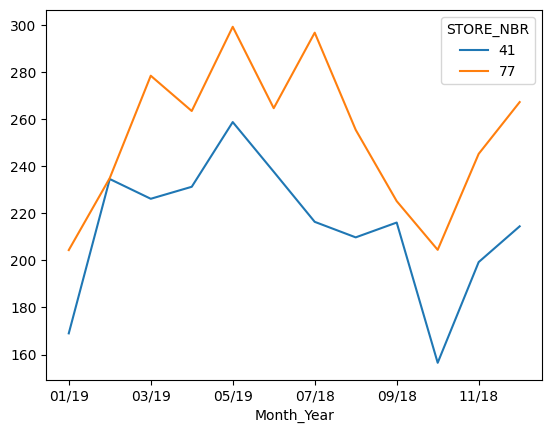

In [16]:
chip1_graph = pivot_chips1[[41,77]]
chip1_graph.plot()
plt.show()

Checking Correlation On Entire Table

In [17]:
total_grp_df = pd.DataFrame(total_grp)
total_grp_pivot = total_grp_df.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = 'TOT_SALES')
total_grp_pivot_table = total_grp_pivot.corr('pearson')
total_grp_pivot_table[77].sort_values(ascending = False).head(10)

STORE_NBR
31     1.000000
77     1.000000
11     1.000000
41     0.762292
35     0.699708
167    0.696075
184    0.645118
63     0.633858
234    0.632204
20     0.620701
Name: 77, dtype: float64

Grabbing The Total Sales Sorted Series To See How The Sales Stack Up For The Top 4 Above By Strogest Correlation

In [18]:
total_sorted.loc[[31 , 77 , 11, 41]]

STORE_NBR
31      14.8
77    3040.0
11       6.7
41    2570.2
Name: TOT_SALES, dtype: float64

Store 31 & 11 are way too low to use

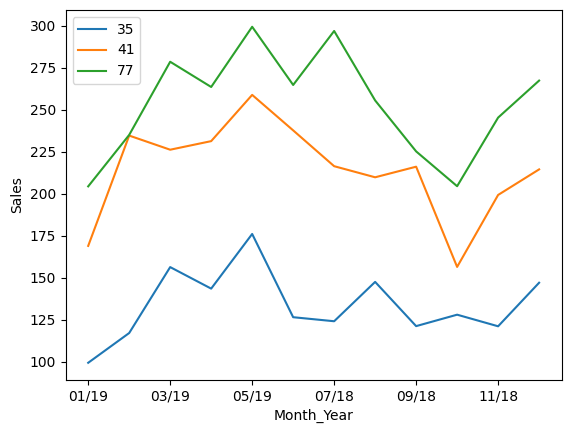

In [19]:
# Grabbing Stores 41, 35, 77 From Total Group Dataframe
three_amigos_77 = total_grp[[41 , 35 , 77]]

# Making Dataframe
amigos_77_df = pd.DataFrame(three_amigos_77)

# Pivoting The Dataframe
amigos_77_pivot = amigos_77_df.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = 'TOT_SALES')
amigos_77_pivot.plot()
plt.legend()
plt.ylabel('Sales')
plt.show()

Store 31 & 11 has good correlation with Store 77. But, Doesn't has good Sales volume. Besides that, Store 41 & 35 has bit more than average correlation with Store 77, But, has good sales Volume.

For trial Store 77, I'll Choose Store 41 as a Control Store. It's Correlation 0.762292.

Sorting Stores by Total Sales Looking For Match For Store 86

In [20]:
total_sorted.iloc[178:201]

STORE_NBR
109    10399.10
191    10404.70
196    10408.20
229    10417.90
97     10432.05
102    10440.70
105    10472.50
232    10485.30
57     10532.30
172    10545.60
113    10551.60
225    10566.60
62     10583.10
236    10621.00
227    10622.50
155    10628.95
86     10635.35
247    10651.50
13     10686.50
164    10718.90
106    10742.60
55     10760.15
138    10824.80
Name: TOT_SALES, dtype: float64

In [21]:
control_store_two = [109, 191, 196, 229, 97, 102, 105, 232, 57, 172, 113, 225, 62, 236, 227, 155, 86, 247, 13, 164, 106, 55, 138]
control_two = pd.DataFrame({"Value" : total_grp[control_store_two]})
print(control_two)

                       Value
STORE_NBR Month_Year        
109       01/19        858.6
          02/19        858.4
          03/19       1039.2
          04/19        728.6
          05/19        720.6
...                      ...
138       08/18        707.4
          09/18        913.6
          10/18       1015.4
          11/18        991.4
          12/18        918.0

[276 rows x 1 columns]


Putting The Stores In a Pivot Table Formate Chart

In [22]:
pivot_chips2 = control_two.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = "Value")
pivot_chips2

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
Month_Year,,,,,,,,,,,,,,,,,,,,,
01/19,927.0,1003.20,852.8,887.8,841.40,844.60,898.0,807.0,869.60,858.6,...,950.2,897.2,851.6,919.4,845.0,986.0,822.4,811.2,838.2,906.2
02/19,868.0,757.80,919.8,864.4,913.20,755.20,773.4,751.8,833.20,858.4,...,753.8,918.4,848.8,732.0,782.8,804.4,827.6,899.9,914.8,930.2
03/19,1035.6,943.60,807.4,889.8,1026.80,853.60,821.8,916.8,938.60,1039.2,...,991.0,727.2,965.4,980.8,829.0,999.4,1031.8,818.4,896.8,888.4
04/19,1024.4,851.80,900.0,885.2,848.20,813.00,718.6,944.6,815.40,728.6,...,1015.6,903.0,1008.8,906.6,1026.2,826.6,914.6,762.6,848.0,1032.0
05/19,803.2,736.85,846.7,754.9,889.30,883.30,890.9,818.1,878.75,720.6,...,874.1,811.6,740.9,901.3,899.6,837.6,815.3,928.0,979.0,932.5
06/19,840.6,999.60,911.0,846.8,838.00,862.00,950.0,835.0,690.20,814.0,...,795.0,1072.0,888.2,761.2,938.4,818.0,879.8,668.2,785.0,890.4
07/18,811.8,889.60,839.6,983.6,892.20,848.20,782.4,928.9,1042.80,884.0,...,853.2,820.8,826.2,876.2,865.0,885.8,876.0,1026.7,952.0,852.4
08/18,756.9,910.30,915.4,792.4,764.05,917.35,986.4,923.7,799.85,828.3,...,920.2,758.0,861.4,848.7,833.4,862.3,757.8,727.9,970.8,781.0
09/18,840.0,1028.80,792.8,972.8,914.60,908.80,970.4,846.6,1158.40,871.4,...,841.4,816.4,803.2,858.4,958.4,779.0,916.8,939.8,864.6,852.4


Create Plot Chaet for Pivot Chips 2

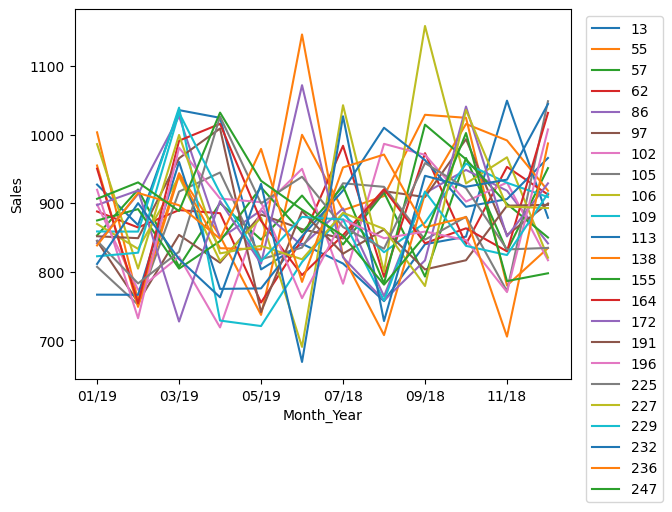

In [23]:
pivot_chips2.plot()
plt.legend(loc = "upper right" , bbox_to_anchor = (1.20 , 1))
plt.ylabel("Sales")
plt.show()

In [24]:
# Total Sales
dataset['TOT_SALES'].sum()

np.float64(1933114.9999999998)

In [25]:
dataset.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,2018-12-30 00:52:10.292937984,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,2018-09-30 00:00:00,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,2018-12-30 00:00:00,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,2019-03-31 00:00:00,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,8.057990e+04,NaN,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148


Let's Give A Look For A Correlation

In [26]:
pivot_chips2.corr('pearson')

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
13,1.000000,-0.125341,-0.291218,0.365314,0.457947,-0.373037,-0.377415,-0.059766,0.049336,0.324289,...,0.357477,-0.091999,0.733656,0.166098,0.043419,0.289917,0.508201,-0.084443,-0.597718,0.167139
55,-0.125341,1.000000,-0.039301,0.181823,0.043906,0.495256,0.418809,0.124132,0.181864,0.326968,...,0.060884,0.250338,0.018181,0.101949,0.338013,0.354941,0.234072,-0.320462,-0.206578,0.096625
57,-0.291218,-0.039301,1.000000,-0.428165,-0.402687,0.221201,-0.139586,0.301428,-0.658612,-0.124668,...,0.060840,0.665384,0.081015,-0.113210,-0.005863,0.106827,-0.335684,-0.100878,0.237461,0.237256
62,0.365314,0.181823,-0.428165,1.000000,0.276452,-0.184301,-0.206387,0.113294,0.634354,0.426023,...,-0.006044,-0.100249,0.227897,0.049385,0.005783,-0.028706,0.426077,0.461276,-0.334550,-0.295701
86,0.457947,0.043906,-0.402687,0.276452,1.000000,-0.015617,-0.226422,-0.202451,0.510548,0.643075,...,-0.117970,-0.156398,0.043345,0.081832,-0.109479,0.393785,0.596886,0.327006,-0.164982,0.250601
97,-0.373037,0.495256,0.221201,-0.184301,-0.015617,1.000000,0.578719,0.334039,0.203434,0.241536,...,0.140764,0.128774,-0.359215,0.240357,0.224941,0.403000,-0.120038,0.141757,0.162069,-0.106598
102,-0.377415,0.418809,-0.139586,-0.206387,-0.226422,0.578719,1.000000,-0.303843,0.088393,0.057036,...,-0.324841,0.000426,-0.454167,-0.283326,-0.023039,-0.009479,-0.406497,-0.251850,-0.245020,-0.460621
105,-0.059766,0.124132,0.301428,0.113294,-0.202451,0.334039,-0.303843,1.000000,-0.084228,0.117184,...,0.754963,-0.099642,0.374381,0.730895,0.169544,0.159843,0.407354,0.176014,0.520565,-0.131195
106,0.049336,0.181864,-0.658612,0.634354,0.510548,0.203434,0.088393,-0.084228,1.000000,0.363415,...,-0.132514,-0.452421,-0.327944,0.110802,0.053068,0.054562,0.233852,0.599607,-0.022502,-0.155990


Store 109 has Strong Correlation With Store 86. Let's Graph it.

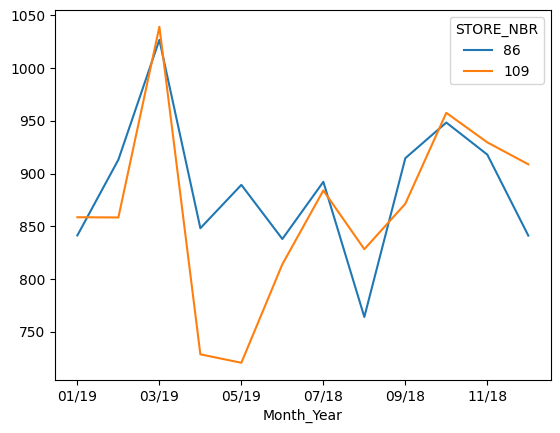

In [27]:
chip2_graph = pivot_chips2[[86 , 109]]
chip2_graph.plot()
plt.show()

Checking Correlation On Entire Table

In [28]:
total_grp_pivot_table[86].sort_values(ascending = False).head(10)

STORE_NBR
31     1.000000
86     1.000000
193    0.933364
159    0.675773
231    0.674071
109    0.643075
132    0.629011
260    0.623775
61     0.617243
229    0.596886
Name: 86, dtype: float64

In [29]:
# Grabbing The Total Sales Sorted Series To See How The Sales Stack Up For The Top 5 Above By Strongest Correlation
total_sorted.loc[[31 , 193 , 159 , 231 , 109]]

STORE_NBR
31        14.8
193       13.1
159      338.9
231    12996.0
109    10399.1
Name: TOT_SALES, dtype: float64

Store Number 31, 193, 159 Are Way Too Low To Use

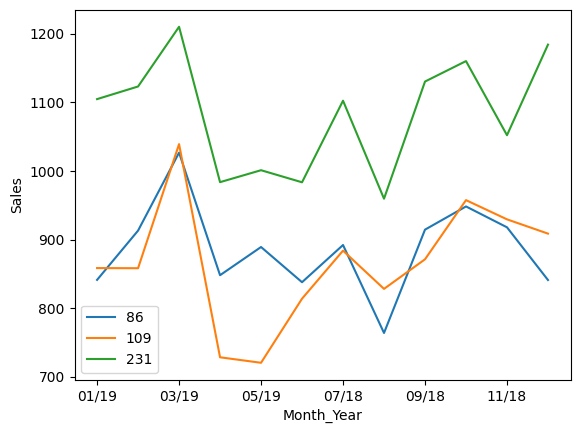

In [30]:
# Grabbing Store 231, 109, 86 From Total Group Dataframe
three_amigos_86 = total_grp[[231 , 109 , 86]]

# Making Dataframe
amigos_86_df = pd.DataFrame(three_amigos_86)

# Pivoting The dataframe
amigos_86_pivot = amigos_86_df.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = 'TOT_SALES')
amigos_86_pivot.plot()
plt.legend()
plt.ylabel('Sales')
plt.show()

Store Number 31 , 193 , 159 Has Good Correlation With Store Number 86.But Doesn't Have Good Sales Volume.Besides That, Store Number 231, 109 Has Good Correlation With Store Number 86 And Even Has Good Sales Volume Too.

For Trial Store 86, I'll Choose Store Number 109 As A Controller Store. It's A 0.643075.

Sorting Stores By Total Sales Looking  For  A Match For Store 88

In [31]:
# Looking For Controller Store For 88
total_grp_pivot_table[88].sort_values(ascending = False).head(10)

STORE_NBR
206    1.000000
88     1.000000
159    0.862608
193    0.836296
201    0.737583
188    0.733516
229    0.707309
228    0.697039
61     0.686658
140    0.613791
Name: 88, dtype: float64

Top 10 Stores Haa Strong Correlation With Store Number 88.

Let's Look At Sorted Sales Colume Of Top 5 Stores Which Has Stong Correlation With Store Number 88

In [32]:
total_sorted.loc[[206 , 159 , 193 , 201 , 188 , 229, 228 , 61 , 140]]

STORE_NBR
206        7.6
159      338.9
193       13.1
201    14298.7
188     3086.0
229    10417.9
228     4236.3
61       562.9
140      244.9
Name: TOT_SALES, dtype: float64

Store Number 206, 159, 193, 61, 140 Are Way Too Low To Use.

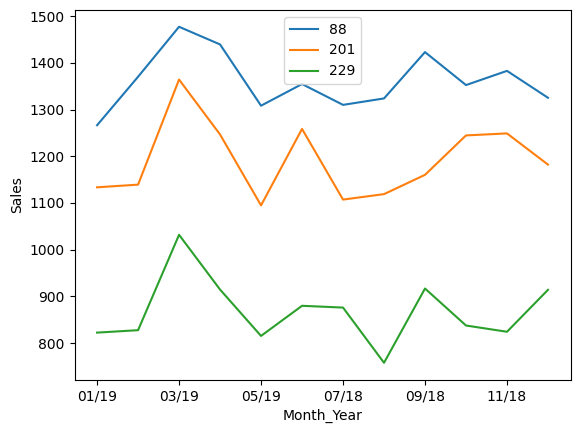

In [33]:
# Grabbing Stores 201, 188, 229, 228 From Total Group Dataframe
three_amigos_88 = total_grp[[201, 229, 88]]

# Making Dataframe
amigos_88_df = pd.DataFrame(three_amigos_88)

# Pivoting The Dataframe
amigos_88_pivot = amigos_88_df.pivot_table(index = 'Month_Year' , columns = 'STORE_NBR' , values = 'TOT_SALES')
amigos_88_pivot.plot()
plt.legend()
plt.ylabel('Sales')
plt.show()


Store Number 201 Comes Closer To Trial Store 88

Store Number 229 Has Good Correlation With Store 88 But Doesn's Has Good Sales Volumer Compare To Store Number 201. Even Store Number 206 Has Best Correlation With Store 88 But Has Not Good Sales Volume.

For Trial Store 88, I'll Choose Store 206 As A Controller.

In [34]:
# Creating A New Dataframe For Trial & Controle Stores
# Selecting Trial & Control Stores From Chip_Trial
trial_store_77 = dataset.loc[dataset['STORE_NBR'] == 77]
control_store_41 = dataset[dataset['STORE_NBR'] == 41]

trial_store_86 = dataset.loc[dataset['STORE_NBR'] == 86]
control_store_109 = dataset[dataset['STORE_NBR'] == 109]

trial_store_88 = dataset.loc[dataset['STORE_NBR'] == 88]
control_store_201 = dataset[dataset['STORE_NBR'] == 201]

trial_store_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month_Year
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03/19
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04/19
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,09/18
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02/19
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,01/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream,07/18
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,11/18
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream,07/18
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget,07/18


Lets Start With Store 77 & 41

In [35]:
# Looking At Total & Product Sold Of Store 77
trial_store_77[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    3040.0
PROD_QTY      872.0
dtype: float64

In [36]:
# Looking At Total & Product Sold Of Control Store 41
control_store_41[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    2570.2
PROD_QTY      723.0
dtype: float64

In [37]:
# Looking At Repeat Cutomers For Trial Stores 77
trial_store_77['LYLTY_CARD_NBR'].value_counts()

LYLTY_CARD_NBR
77476    5
77109    4
77205    4
77066    4
77093    4
        ..
77023    1
77024    1
77025    1
77187    1
77003    1
Name: count, Length: 356, dtype: int64

In [38]:
# Total Cusomer Transactions For Trial Store 77
trial_store_77['LYLTY_CARD_NBR'].count()

np.int64(563)

In [39]:
# Looking At Repeat Cutomers For Control Store 41
control_store_41['LYLTY_CARD_NBR'].value_counts()

LYLTY_CARD_NBR
41497    4
41453    4
41466    4
41367    4
41359    4
        ..
41471    1
41499    1
41002    1
41001    1
41505    1
Name: count, Length: 344, dtype: int64

In [40]:
# Total Cusomer Transactions Of Control Store 41
control_store_41['LYLTY_CARD_NBR'].count()

np.int64(567)

In [41]:
# Count Reapeat Customers Of Trial Store 77 That Purchased More Than Once
repeat_customers_77 = (trial_store_77['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_77)

149


In [42]:
# Count Reapeat Customers Of Control Store 41 That Purchased More Than Once
repeat_customers_41 = (control_store_41['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_41)

155


In [43]:
# Grouping Stores By Months
grouped77 = trial_store_77.groupby('Month_Year')
grouped41 = control_store_41.groupby('Month_Year')

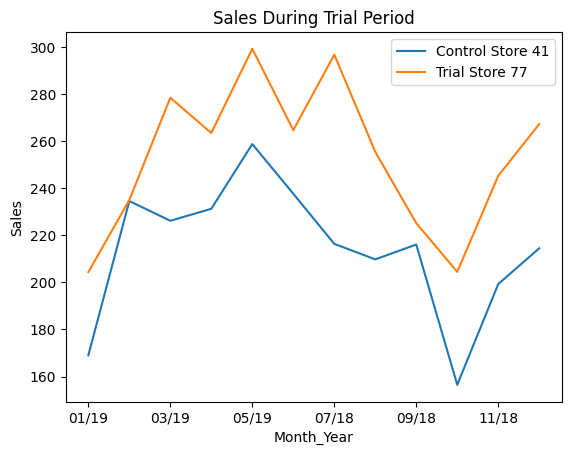

In [44]:
grouped41['TOT_SALES'].sum().plot(label = 'Control Store 41')
grouped77['TOT_SALES'].sum().plot(label = 'Trial Store 77')

plt.ylabel('Sales')
plt.legend()
plt.title('Sales During Trial Period')
plt.show()

Can See The Clear Difference Between Trial Store 71 Ans Control Store 41

**Let's Look At The Trial Store 86 And Control Store 109**

In [45]:
# Looking At Total Sale & Product Sold In Trial Store 86
trial_store_86[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    10635.35
PROD_QTY      3066.00
dtype: float64

In [46]:
# Looking At Total Sale & Product Sold In Trial Store 109
control_store_109[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    10399.1
PROD_QTY      2977.0
dtype: float64

In [47]:
# Looking At Repeat Customers Of Trial Stores 86 Thet Purchased More Than Once
repeat_customers_86 = (trial_store_86['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_86)

256


In [48]:
# Looking At Repeat Customers Of Control Stores 109 Thet Purchased More Than Once
repeat_customers_109 = (control_store_109['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_109)

253


In [49]:
# Trial Store 86, Total Customer Transaction
trial_store_86['LYLTY_CARD_NBR'].count()

np.int64(1538)

In [50]:
# Control Store 109, Total Customer Transaction
control_store_109['LYLTY_CARD_NBR'].count()

np.int64(1505)

In [51]:
# Grouping Stores By Month
grouped86 = trial_store_86.groupby('Month_Year')
grouped109 = control_store_109.groupby('Month_Year')

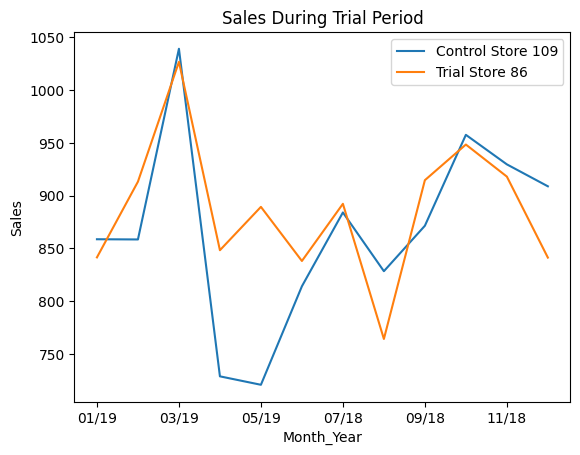

In [52]:
grouped109['TOT_SALES'].sum().plot(label = 'Control Store 109')
grouped86['TOT_SALES'].sum().plot(label = 'Trial Store 86')

plt.ylabel('Sales')
plt.legend()
plt.title('Sales During Trial Period')
plt.show()

Can See The Difference Between Trial Store & Control Store

**Lets Look At Trial Store 88 & Control Store 206**

In [53]:
# Looking At Total Sales & Product Quantity Sold Of Trial Store 88
trial_store_88[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    16333.25
PROD_QTY      3718.00
dtype: float64

In [54]:
# Looking At Total Sales & Product Quantity Sold Of Control Store 201
control_store_201[['TOT_SALES' , 'PROD_QTY']].sum()

TOT_SALES    14298.7
PROD_QTY      3262.0
dtype: float64

In [55]:
# Looking Distinct Repected Customers Of Trial Store 88 That Purchased More Than Once
repeat_customers_88 = (trial_store_88['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_88)

357


In [56]:
# Looking Distinct Repected Customers Of Control Store 201 That Purchased More Than Once
repeat_customers_201 = (control_store_201['LYLTY_CARD_NBR'].value_counts() > 1).sum()
print(repeat_customers_201)

351


In [57]:
# Total Customers Transaction Of Trial Store 88
trial_store_88['LYLTY_CARD_NBR'].count()

np.int64(1873)

In [58]:
# Total Customers Transation Of Control Store 201
control_store_201['LYLTY_CARD_NBR'].count()

np.int64(1654)

In [59]:
# Grouing The Store By Month
grouped88 = trial_store_88.groupby('Month_Year')
grouped201 = control_store_201.groupby('Month_Year')

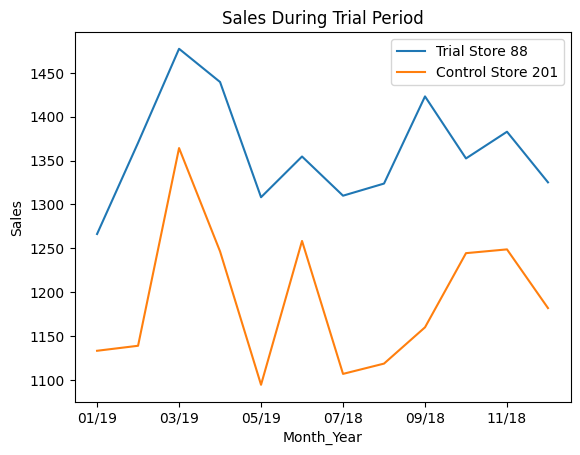

In [60]:
grouped88['TOT_SALES'].sum().plot(label = 'Trial Store 88')
grouped201['TOT_SALES'].sum().plot(label = 'Control Store 201')

plt.ylabel('Sales')
plt.legend()
plt.title('Sales During Trial Period')
plt.show()

Can See The Clear Difference Between Trial Store 88 And Control Store 201

**Lets Visualize The Product Quantity Sold**

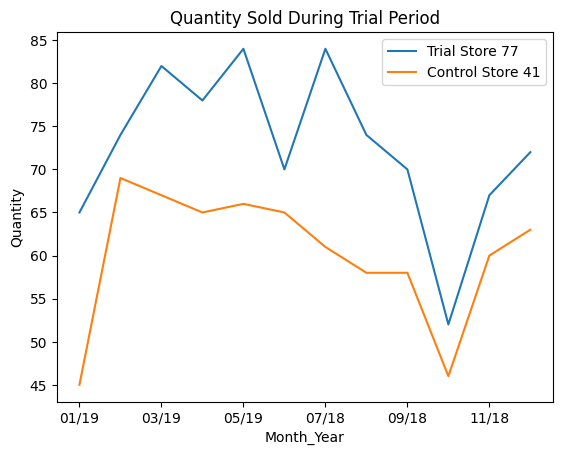

In [61]:
grouped77['PROD_QTY'].sum().plot(label = 'Trial Store 77 ')
grouped41['PROD_QTY'].sum().plot(label = 'Control Store 41')

plt.ylabel('Quantity')
plt.legend()
plt.title('Quantity Sold During Trial Period')
plt.show()

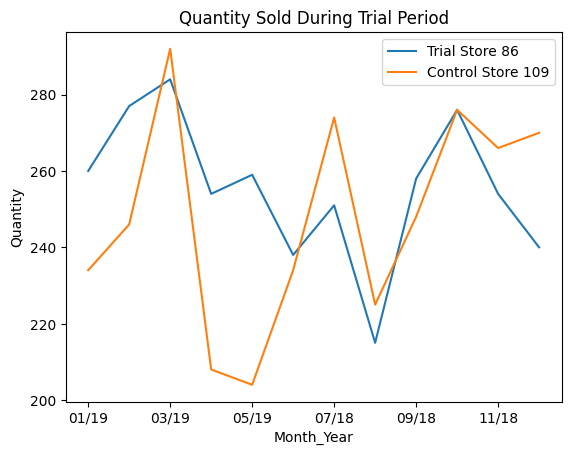

In [62]:
grouped86['PROD_QTY'].sum().plot(label = 'Trial Store 86 ')
grouped109['PROD_QTY'].sum().plot(label = 'Control Store 109')

plt.ylabel('Quantity')
plt.legend()
plt.title('Quantity Sold During Trial Period')
plt.show()

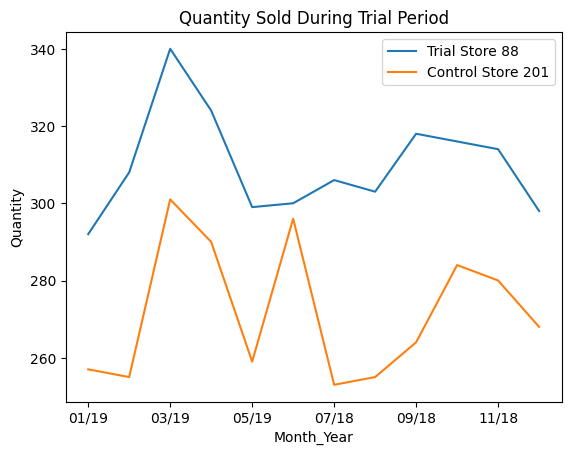

In [63]:
grouped88['PROD_QTY'].sum().plot(label = 'Trial Store 88 ')
grouped201['PROD_QTY'].sum().plot(label = 'Control Store 201')

plt.ylabel('Quantity')
plt.legend()
plt.title('Quantity Sold During Trial Period')
plt.show()

**As We Can See Trial Store Outperformed The Control Stores In Quantity Sold**

Lets See In Terms Of Average Cutomer Transaction

In [64]:
grouped77['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.048417132216015)

In [65]:
grouped41['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.05)

In [66]:
grouped86['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2544861337683524)

In [67]:
grouped109['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2918454935622317)

In [68]:
grouped88['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.2363036303630364)

In [69]:
grouped201['LYLTY_CARD_NBR'].value_counts().mean()

np.float64(1.1689045936395759)

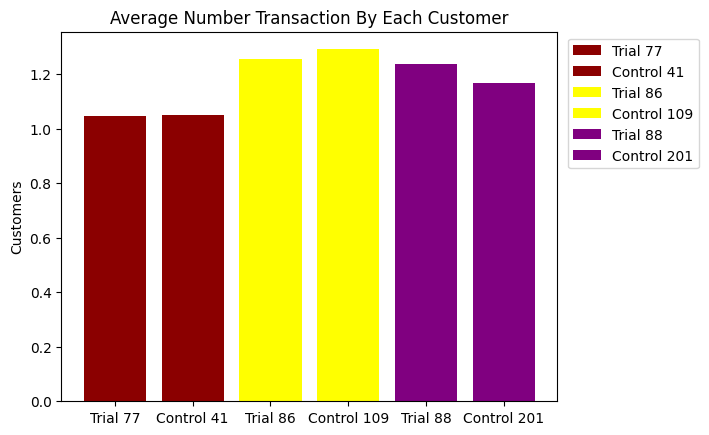

In [70]:
group_1 = ['Trial 77' , 'Control 41']
group_2 = ['Trial 86' , 'Control 109']
group_3 = ['Trial 88' , 'Control 201']

value_group1 = [1.048417132216015 , 1.05]
value_group2 = [1.2544861337683524 , 1.2918454935622317]
value_group3 = [1.2363036303630364 , 1.1689045936395759]

plt.bar(group_1 , value_group1, label = group_1 , color = 'darkred') 
plt.bar(group_2 , value_group2, label = group_2 , color = 'yellow') 
plt.bar(group_3 , value_group3, label = group_3 , color = 'purple')


plt.ylabel('Customers')
plt.title('Average Number Transaction By Each Customer')
plt.legend(loc = 'upper right' , bbox_to_anchor = (1.3 , 1))
plt.show()

**As Per This Graph**
- Control Stores 41 & 109 Are Outperforming The Trial Store In Average Customers Transation.
- Trial Store 88 is giving More Average Customer Transactons Than Cntrol Store 201.

I Believe That Control Stores Are Slighlty Better Performing Than Trail Stores In Sales, Quantity Selling And Even In Customer's Avg Transactoins. Need To Be More Focused For Trial So That Trial Stores Can Also Make Profit As Control Stores.

In [80]:
dataset.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending = False)

BRAND
KETTLE        390239.8
DORITOS       240590.9
SMITHS        224660.2
PRINGLES      177655.5
INFUZIONS      99047.6
RRD            95046.0
OLD            90785.1
THINS          88852.5
TWISTIES       81522.1
TOSTITOS       79789.6
COBS           70569.8
TYRRELLS       51647.4
GRNWVES        51617.2
WOOLWORTHS     49343.6
NATURAL        42318.0
CHEEZELS       40029.9
CCS            18078.9
CHEETOS        16884.5
SUNBITES        9676.4
FRENCH          7929.0
BURGER          6831.0
Name: TOT_SALES, dtype: float64

In [77]:
dataset.groupby('PACK_SIZE')[['PROD_QTY' , 'TOT_SALES']].sum().sort_values(by = 'TOT_SALES', ascending = False)

,PROD_QTY,TOT_SALES
PACK_SIZE,,
175,126467,485437.4
150,82174,304288.5
134,48019,177655.5
110,42835,162765.4
170,38088,146673.0
330,23999,136794.3
300,28813,113330.6
165,29051,101360.6
380,12273,75419.6


In [ ]:
dataset.groupby(['LIFESTAGE' , 'BRAND'])['TOT_SALES'].sum().sort_values(ascending = False)



LIFESTAGE              BRAND   
OLDER SINGLES/COUPLES  KETTLE      83862.6
RETIREES               KETTLE      76914.8
OLDER FAMILIES         KETTLE      65984.0
YOUNG FAMILIES         KETTLE      60033.0
YOUNG SINGLES/COUPLES  KETTLE      54241.0
                                    ...   
NEW FAMILIES           CCS           352.8
                       CHEETOS       325.3
                       SUNBITES      176.8
                       FRENCH        168.0
                       BURGER        161.0
Name: TOT_SALES, Length: 147, dtype: float64

In [90]:
# Pivot Table Lifestage Affluence By Brands
customes_affluence_table = dataset.pivot_table(index = 'LIFESTAGE' , columns = ['BRAND'] , values = 'TOT_SALES' , aggfunc = 'sum' , fill_value= 0)

customes_affluence_df = customes_affluence_table.reset_index()
print(customes_affluence_df)

BRAND               LIFESTAGE  BURGER     CCS  CHEETOS  CHEEZELS     COBS  \
0      MIDAGE SINGLES/COUPLES   660.1  1717.8   1499.7    4080.6   6995.8   
1                NEW FAMILIES   161.0   352.8    325.3     998.1   2059.6   
2              OLDER FAMILIES  1566.3  3830.4   3686.2    7002.9  12027.0   
3       OLDER SINGLES/COUPLES  1271.9  3385.2   3390.6    8310.0  14812.4   
4                    RETIREES  1131.6  2933.7   2785.5    7561.8  13687.6   
5              YOUNG FAMILIES  1320.2  3645.6   3261.2    6759.0  11141.6   
6       YOUNG SINGLES/COUPLES   719.9  2213.4   1936.0    5317.5   9845.8   

BRAND   DORITOS  FRENCH  GRNWVES  INFUZIONS  ...      OLD  PRINGLES      RRD  \
0      22725.60   654.0   4919.8     9833.4  ...   8863.8   16875.7   8494.8   
1       6693.55   168.0   1423.8     2696.0  ...   2371.5    4898.8   1984.8   
2      41822.90  1632.0   9583.3    17560.8  ...  15804.9   30584.2  21448.2   
3      50985.45  1566.0  10752.4    20720.6  ...  18992.4   376

In [ ]:
lifestage_sales = dataset.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending = False)
lifestage_sales

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            352467.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

C:\Users\TARUN\AppData\Local\Temp\ipykernel_17348\4143278360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lifestage_sales.index, y=lifestage_sales.values, palette="viridis")


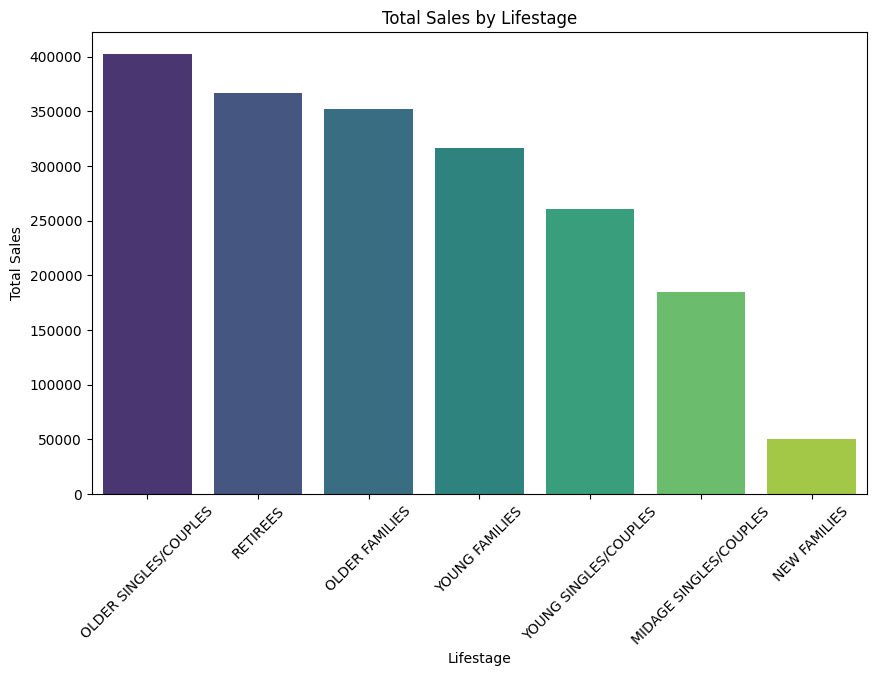

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x=lifestage_sales.index, y=lifestage_sales.values, palette="viridis")

# Add labels and title
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.title("Total Sales by Lifestage")
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show plot
plt.show()

In [113]:
lifestage_qty = dataset.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending = False)
lifestage_qty

LIFESTAGE
OLDER SINGLES/COUPLES     104203
OLDER FAMILIES             94592
RETIREES                   94166
YOUNG FAMILIES             84561
YOUNG SINGLES/COUPLES      66634
MIDAGE SINGLES/COUPLES     47721
NEW FAMILIES               12847
Name: PROD_QTY, dtype: int64

In [117]:
ifestage_brand = dataset.groupby(['LIFESTAGE' , 'BRAND'])['BRAND'].count().sort_values(ascending = False)
ifestage_brand

LIFESTAGE              BRAND   
OLDER SINGLES/COUPLES  KETTLE      8847
RETIREES               KETTLE      8194
OLDER FAMILIES         KETTLE      6851
                       SMITHS      6443
OLDER SINGLES/COUPLES  SMITHS      6320
                                   ... 
NEW FAMILIES           CCS           93
                       CHEETOS       62
                       SUNBITES      61
                       BURGER        40
                       FRENCH        32
Name: BRAND, Length: 147, dtype: int64